<a href="https://colab.research.google.com/github/cannel14/-Classification-Analysis-Supervised-Learning-/blob/main/Google_play_store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**B2C IPG Merchant Payment App
Competitor Analysis **

IPG Merchant payment app has many competitors but we're going to take a deep dive on the three main competitors,this include:
1. Kopokopo
2. PesaPal
3. Paystack
4. Uza point



While trying to understand the overall market share of each competitor one of the identifiers/ distinguishers in terms of Market share is Product review from the end consumers of a particular product.In this case, we're going to conduct a sentimental analysis to get a feel of how the customer feels or bring emotions.

Sentiment analysis, also known as opinion mining, is the process of using natural language processing, text analysis, and computational linguistics to identify and extract subjective information from text. It is often used to determine the overall sentiment of a piece of text, such as whether a review of a product is positive or negative.

There are several ways to perform sentimental analysis in Python. One way is to use a pre-trained machine learning model to classify text as having positive, negative, or neutral sentiment.

The sentiment attribute of the TextBlob object returns a tuple containing the polarity and subjectivity of the text. The polarity is a value between -1 and 1, where -1 indicates a negative sentiment and 1 indicates a positive sentiment. The subjectivity is a value between 0 and 1, where 0 indicates a very objective piece of text and 1 indicates a very subjective piece of text.

In [ ]:
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=eefa6ad98dc80472e89a21c6e23cfcc0531e9049e6d381de3baff49bd80a3cad
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


We can use libraries like NLTK, Gensim, TextBlob, spaCY, CoreNLP for data pre-processing and sentiment analysis. We will use NLTK for pre-processing of data and TextBlob to calculate sentiment score (sentiment polarity and subjectivity ) .

In [ ]:
# import libraries
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import emoji
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Kopo Kopo Reviews Sentimental Analysis**

Kopokopo Web scrapping

In [ ]:
#scrap all reviews
Kopo_kopo, continuation_token = reviews(
    'com.kopokopo.kopo',
    sort = Sort.MOST_RELEVANT,
    count = 900,
    filter_score_with = None
    
)

## Pesapal RSA

Pesapal Web scrapping

In [ ]:
#scrap all reviews
Pesapal, continuation_token = reviews(
    'duka.pesapal.com',
    sort = Sort.MOST_RELEVANT,
    count = 900,
    filter_score_with = None
    
)

## **Paystack RSA**

PayPal Web scrapping

In [ ]:
#scrap all reviews
Pay_stack, continuation_token = reviews(
    'com.paystack.go',
    sort = Sort.MOST_RELEVANT,
    count = 900,
    filter_score_with = None
    
)

# UzaPoint RSA

Uzapoint webscrapping

In [ ]:
#scrap all reviews
Uza_point, continuation_token = reviews(
    'com.uzapoint.upduka',
    sort = Sort.MOST_RELEVANT,
    count = 900,
    filter_score_with = None
    
)

## **PesaPal data Import**

Converting Pesapal scrapped data to Data Frame(Structured data) for our analysis.

In [ ]:
#converting into data Frame
PesaPal_data = pd.DataFrame(np.array(Pesapal), columns = ['review'])
PesaPal_data = PesaPal_data.join(pd.DataFrame(PesaPal_data.pop('review').tolist()))
PesaPal_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,2ece545e-bd8a-4750-ab29-b509cce6b677,kiirya ronald,https://play-lh.googleusercontent.com/a-/AD5-W...,"One of the best POs app, one improvement neede...",3,0,35.4,2022-06-22 06:50:54,None,None
1,f7c64b4c-1110-4550-9ce9-bb2b589fa9be,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's the best love it, saves time and it's acc...",5,7,29,2018-11-21 09:48:20,None,None
2,a28a93de-7198-4e9c-827b-f198f0992520,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The app is nice but anytime I try selling on c...,5,3,29,2019-12-09 18:59:03,None,None
3,0e8361a1-20a9-473f-b0ef-ba1c275e7224,serah mutemi,https://play-lh.googleusercontent.com/a-/AD5-W...,Its a good app I wish it were available on des...,4,6,32,2020-08-27 07:41:29,None,None
4,465370fa-dccf-4a15-9bd1-2f71fe898939,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,best app need charts summary thanks alot,5,3,29,2019-01-13 19:23:58,None,None


Pesapal Data Description and understanding

In [ ]:
print(PesaPal_data.shape)
PesaPal_data.info()

(21, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21 non-null     object        
 1   userName              21 non-null     object        
 2   userImage             21 non-null     object        
 3   content               21 non-null     object        
 4   score                 21 non-null     int64         
 5   thumbsUpCount         21 non-null     int64         
 6   reviewCreatedVersion  17 non-null     object        
 7   at                    21 non-null     datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.8+ KB


In [ ]:
len(PesaPal_data.index) # checking the number of observations for our dataset

21

In [ ]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)
PesaPal_data1 = PesaPal_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]
PesaPal_data1.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,"One of the best POs app, one improvement neede...",35.4,3,2022-06-22 06:50:54,0
1,"It's the best love it, saves time and it's acc...",29,5,2018-11-21 09:48:20,7
2,The app is nice but anytime I try selling on c...,29,5,2019-12-09 18:59:03,3
3,Its a good app I wish it were available on des...,32,4,2020-08-27 07:41:29,6
4,best app need charts summary thanks alot,29,5,2019-01-13 19:23:58,3


In [ ]:
PesaPalsort_data = PesaPal_data1.sort_values(by="at", ascending= False) # arranging the data starting from the newest to oldest
PesaPalsort_data.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,"One of the best POs app, one improvement neede...",35.4,3,2022-06-22 06:50:54,0
19,Uduma nzuri inarahisisha,None,5,2021-12-28 10:23:57,0
6,Pesapal ina saìdia wakati wowote ile unapoiita...,29,4,2020-10-06 05:37:35,0
3,Its a good app I wish it were available on des...,32,4,2020-08-27 07:41:29,6
2,The app is nice but anytime I try selling on c...,29,5,2019-12-09 18:59:03,3


In [ ]:
PesaPalsort_data.to_excel("PesaPal.xlsx", index = False) #download PesaPal excel file

## **PayStack data Import**

Converting Paystack scrapped data to Data Frame(Structured data) for our analysis.

In [ ]:
#converting into data Frame
Paystack_data = pd.DataFrame(np.array(Pay_stack), columns = ['review'])
Paystack_data = Paystack_data.join(pd.DataFrame(Paystack_data.pop('review').tolist()))
Paystack_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,edfc3d36-bb4d-4d5a-b747-889cfa726ad9,Edidiong Ibanga,https://play-lh.googleusercontent.com/a-/AD5-W...,Please this updated version is really giving m...,1,4,1.9.3,2022-11-11 14:19:40,None,NaT
1,899a557e-daad-4f9a-9b53-d023babb2fed,Miracle Enomfon (Godfather),https://play-lh.googleusercontent.com/a-/AD5-W...,After creating an account in the app I could n...,1,3,1.9.3,2022-11-19 11:32:25,None,NaT
2,3c5d3256-efed-41ec-b01a-5f328ad16610,ODU Enemona Daniel prime,https://play-lh.googleusercontent.com/a-/AD5-W...,"the updated version is not signing in, when i ...",1,2,1.9.3,2022-11-18 08:10:45,None,NaT
3,d554cb22-684d-45c7-ae0a-c9f0f83e222f,Chukwuemeka Precious Asadu,https://play-lh.googleusercontent.com/a-/AD5-W...,Awesome experience. I've been awaiting this fo...,4,67,1.1.4,2020-05-31 08:45:28,"Hi Chukuwemeka, thank you so much for the kind...",2020-06-16 18:23:29
4,ca2475d9-70f9-4f67-8c64-3c2f2c16fe77,ige james,https://play-lh.googleusercontent.com/a-/AD5-W...,The app is user friendly and easy to navigate ...,4,7,1.8.3,2022-10-17 08:02:33,None,NaT


Paystack data decription and understanding

In [ ]:
print(Paystack_data.shape)
Paystack_data.info()

(280, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              280 non-null    object        
 1   userName              280 non-null    object        
 2   userImage             280 non-null    object        
 3   content               280 non-null    object        
 4   score                 280 non-null    int64         
 5   thumbsUpCount         280 non-null    int64         
 6   reviewCreatedVersion  222 non-null    object        
 7   at                    280 non-null    datetime64[ns]
 8   replyContent          138 non-null    object        
 9   repliedAt             138 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 22.0+ KB


In [ ]:
len(Paystack_data.index) # Paystack number of reviews

280

In [ ]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)
Paystack_data1 = Paystack_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]
Paystack_data1.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,Please this updated version is really giving m...,1.9.3,1,2022-11-11 14:19:40,4
1,After creating an account in the app I could n...,1.9.3,1,2022-11-19 11:32:25,3
2,"the updated version is not signing in, when i ...",1.9.3,1,2022-11-18 08:10:45,2
3,Awesome experience. I've been awaiting this fo...,1.1.4,4,2020-05-31 08:45:28,67
4,The app is user friendly and easy to navigate ...,1.8.3,4,2022-10-17 08:02:33,7


In [ ]:
Paystacksort_data = Paystack_data1.sort_values(by="at", ascending= False) # arranging the data starting from the newest to oldest
Paystacksort_data.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
71,This app is good,1.9.4,5,2022-12-30 15:17:49,0
232,Really appreciated,1.9.4,5,2022-12-30 01:58:15,0
52,Kenya is missing on registration. I thought yo...,1.9.4,2,2022-12-21 20:58:35,0
152,Word conect game,1.9.4,5,2022-12-08 07:46:36,0
56,I give it 3 🌟 because it not working today,1.9.4,3,2022-12-01 00:54:55,1


In [ ]:
Paystacksort_data.to_excel("Paystack.xlsx", index = False) #download Paystack excel file

## **Kopo Kopo data Import**

Converting Kopokopo scrapped data to Data Frame(Structured data) for our analysis.

In [ ]:
#converting into data Frame
Kopo_kopo_data = pd.DataFrame(np.array(Kopo_kopo), columns = ['review'])
Kopo_kopo_data = Kopo_kopo_data.join(pd.DataFrame(Kopo_kopo_data.pop('review').tolist()))
Kopo_kopo_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,06a3732e-95ef-4cea-b0a7-1a31e9cad9bc,Jay Ngareh,https://play-lh.googleusercontent.com/a-/AD5-W...,"This new app is not user friendly, to complica...",5,71,6.0.0,2022-12-30 19:29:44,"Hi Jimmyjey, after signing in for the first ti...",2021-09-29 17:58:19
1,a2795acb-8503-45f0-b7a4-d6528943445c,kinyua royford,https://play-lh.googleusercontent.com/a-/AD5-W...,Ultimate Solution for Business Payments. You c...,5,7,5.3.0,2022-10-06 08:00:04,None,NaT
2,79e24100-2cde-4ca5-92bf-4106acb5fbd1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,For such a big responsibility when it comes to...,1,71,4.1.4,2019-08-08 13:07:35,None,NaT
3,49c94884-262d-48fd-8f91-7608c1ad0c28,Michael Kuria,https://play-lh.googleusercontent.com/a-/AD5-W...,Great features in the updated version but it c...,3,27,5.0.2,2021-10-13 10:15:32,"Hi Michael, thank you for your feedback and pa...",2021-10-21 09:05:14
4,956f73e1-9e85-41b8-b63c-47786dfbe268,Judith Mbuthia,https://play-lh.googleusercontent.com/a/AEdFTp...,It's a nice app when it comes to transfer of f...,3,81,4.2.4,2020-10-12 12:57:27,"Hi Judith, what is your till number? Did you h...",2020-10-12 18:20:14


kopokopo data description and understanding

In [ ]:
#view the columns and shape
print(Kopo_kopo_data.shape)
Kopo_kopo_data.info()

(307, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              307 non-null    object        
 1   userName              307 non-null    object        
 2   userImage             307 non-null    object        
 3   content               307 non-null    object        
 4   score                 307 non-null    int64         
 5   thumbsUpCount         307 non-null    int64         
 6   reviewCreatedVersion  229 non-null    object        
 7   at                    307 non-null    datetime64[ns]
 8   replyContent          85 non-null     object        
 9   repliedAt             85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 24.1+ KB


There are many columns which are not useful for our analysis. So, we can just pick out the ones that are essential for analysis like “reviewCreateVersion” which shows the version of application over which reviews are given by customers, “score” which is given by customer in the range 1–5, where, 1 is lower most value and denotes a negative review and 5 is the higher most value and denotes a positive review, “content” which denotes the reviews given by the customers for the application.

In [ ]:
len(Kopo_kopo_data.index) # there's a total of 306 observations and reviews

307

In [ ]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)
Kopo_kopo_data1 = Kopo_kopo_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]
Kopo_kopo_data1.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,"This new app is not user friendly, to complica...",6.0.0,5,2022-12-30 19:29:44,71
1,Ultimate Solution for Business Payments. You c...,5.3.0,5,2022-10-06 08:00:04,7
2,For such a big responsibility when it comes to...,4.1.4,1,2019-08-08 13:07:35,71
3,Great features in the updated version but it c...,5.0.2,3,2021-10-13 10:15:32,27
4,It's a nice app when it comes to transfer of f...,4.2.4,3,2020-10-12 12:57:27,81


In [ ]:
Kopo_koposort_data = Kopo_kopo_data1.sort_values(by="at", ascending= False) # arranging the data starting from the newest to oldest
Kopo_koposort_data.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
163,New year challenge. Add push notifications to ...,6.0.0,4,2023-01-02 14:53:52,0
0,"This new app is not user friendly, to complica...",6.0.0,5,2022-12-30 19:29:44,71
63,I like how you communicate and also your loan ...,5.3.0,4,2022-12-22 06:36:56,0
171,Good services,5.3.0,5,2022-12-16 16:45:40,0
145,So far so good,5.3.0,5,2022-12-16 06:24:05,0


In [ ]:
Kopo_koposort_data.to_excel("KopoKopo.xlsx", index = False) #download kopokopo excel file

## **UzaPoint data Import**

Converting Uzapoint scrapped data to Data Frame(Structured data) for our analysis.

In [ ]:
#converting into data Frame
Uza_point_data = pd.DataFrame(np.array(Uza_point), columns = ['review'])
Uza_point_data = Uza_point_data.join(pd.DataFrame(Uza_point_data.pop('review').tolist()))
Uza_point_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,88b3daaf-4aed-4448-8b51-6c471faf2dd7,Joey WK,https://play-lh.googleusercontent.com/a-/AD5-W...,An amazing POS for sure. Very effective in man...,5,2,1.16.3,2021-11-20 09:02:43,None,NaT
1,8ceeb520-81b4-4e66-a12d-84347eb46c19,Anne Wanjiru,https://play-lh.googleusercontent.com/a/AEdFTp...,The app is user-friendly. I like the simplicit...,5,0,1.0.9,2020-06-18 14:22:10,Thank you for your encouraging words.,2021-05-26 09:57:24
2,4b971b47-b3c2-43d1-b85b-07e7f64f1c31,Wendy Mejah,https://play-lh.googleusercontent.com/a-/AD5-W...,I'm impressed that the team is very responsive...,5,0,1.11.0,2021-05-28 08:07:18,"Thank you for your valuable feedback. Kindly, ...",2021-05-26 09:29:40
3,220ac702-826d-4f49-957b-9dac7005fbfe,james njuguna,https://play-lh.googleusercontent.com/a-/AD5-W...,If there is one thing that came to save my bus...,5,1,1.16.4,2022-01-17 14:09:45,None,NaT
4,b0dc1745-c6a0-4f7d-80e7-c09d18c9730b,Emmah Cherutich,https://play-lh.googleusercontent.com/a/AEdFTp...,This is the most efficient app ive come across...,5,2,1.1.41,2020-09-24 16:24:17,Thank you for providing your valuable feedback...,2021-05-26 09:54:52


In [ ]:
#view the columns and shape
print(Uza_point_data.shape)
Uza_point_data.info()

(65, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              65 non-null     object        
 1   userName              65 non-null     object        
 2   userImage             65 non-null     object        
 3   content               65 non-null     object        
 4   score                 65 non-null     int64         
 5   thumbsUpCount         65 non-null     int64         
 6   reviewCreatedVersion  56 non-null     object        
 7   at                    65 non-null     datetime64[ns]
 8   replyContent          23 non-null     object        
 9   repliedAt             23 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 5.2+ KB


In [ ]:
len(Uza_point_data.index) 

65

In [ ]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)
Uza_point_data1 = Uza_point_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]
Uza_point_data1.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,An amazing POS for sure. Very effective in man...,1.16.3,5,2021-11-20 09:02:43,2
1,The app is user-friendly. I like the simplicit...,1.0.9,5,2020-06-18 14:22:10,0
2,I'm impressed that the team is very responsive...,1.11.0,5,2021-05-28 08:07:18,0
3,If there is one thing that came to save my bus...,1.16.4,5,2022-01-17 14:09:45,1
4,This is the most efficient app ive come across...,1.1.41,5,2020-09-24 16:24:17,2


In [ ]:
Uza_pointsort_data = Uza_point_data1.sort_values(by="at", ascending= False) # arranging the data starting from the newest to oldest
Uza_pointsort_data.head()


,content,reviewCreatedVersion,score,at,thumbsUpCount
20,It's an amazing app.Whats makes it better is t...,1.16.5,5,2022-11-27 21:27:11,0
13,'You need an API key to authenticate all reque...,1.16.5,1,2022-07-27 07:26:06,0
41,Efficient and easy to use for my business,1.16.5,5,2022-07-22 06:05:47,0
37,Excited to use Uzapoint. The e-commerce platfo...,1.16.5,5,2022-07-20 06:43:06,0
55,"What a wonderful system, since I started Uzapo...",1.16.5,5,2022-07-13 08:42:26,0


In [ ]:
Uza_pointsort_data.to_excel("UzaPoint.xlsx", index = False) #download kopokopo excel file

## **EXPLORATORY DATA ANALYSIS**

**CHECKING MISSING VALUES**

## **1. Kopo kopo**

In [ ]:
Kopo_koposort_data_sum_missing = Kopo_koposort_data.isnull().sum()
print(Kopo_koposort_data_sum_missing) # Eventhough we've 78 missing value

content                  0
reviewCreatedVersion    78
score                    0
at                       0
thumbsUpCount            0
dtype: int64


The App has many different versions let's check which version has the best review.

In [ ]:
highest_score = Kopo_koposort_data[Kopo_koposort_data["score"]==5]
print("KopoKopo highest scores:", highest_score.head())

KopoKopo highest scores:                                                content reviewCreatedVersion  \
0    This new app is not user friendly, to complica...                6.0.0   
171                                      Good services                5.3.0   
145                                     So far so good                5.3.0   
170                                       Good service                5.3.0   
23   Great app, withdrawals never take more than 5m...                5.3.0   

     score                  at  thumbsUpCount  
0        5 2022-12-30 19:29:44             71  
171      5 2022-12-16 16:45:40              0  
145      5 2022-12-16 06:24:05              0  
170      5 2022-12-14 01:52:08              0  
23       5 2022-12-09 18:07:27              0  


In [ ]:
medium_score = Kopo_koposort_data[Kopo_koposort_data["score"] == 3]
print("Kopokopo medium score:", medium_score.head()) 

Kopokopo medium score:                                                content reviewCreatedVersion  \
166                                              Good.                5.3.0   
111                                 Nice but expensive                 None   
32   Fantastic App but your interest rates on the g...                5.3.0   
158                         Trying for the first time.                 None   
21   Kindly include the totals of daily transaction...                5.1.0   

     score                  at  thumbsUpCount  
166      3 2022-10-21 06:49:52              0  
111      3 2022-09-22 05:17:30              0  
32       3 2022-09-15 06:42:22              9  
158      3 2022-03-09 08:59:45              0  
21       3 2022-02-06 05:39:22             60  


How many versions are there?

In [ ]:
print(Kopo_koposort_data.reviewCreatedVersion.nunique())
print(Kopo_koposort_data.reviewCreatedVersion.unique())
print(Kopo_koposort_data.reviewCreatedVersion.value_counts())

23
['6.0.0' '5.3.0' None '5.2.0' '5.1.0' '5.0.3' '4.2.4' '5.0.2' '4.1.4'
 '5.0.0' '4.1.8' '4.1.6' '4.1.2' '3.0.1' '4.1.1' '4.0.4' '4.0.3' '3.0.0'
 '2.2.2' '2.2.1' '2.1.3' '2.1.2' '2.1.0' '2.0.3 (Beta)']
5.3.0           40
4.1.4           35
4.2.4           27
2.2.2           24
5.1.0           23
4.1.2           14
4.1.6           11
5.2.0            8
5.0.2            7
5.0.3            6
4.1.8            6
5.0.0            5
4.1.1            4
3.0.0            4
3.0.1            3
2.1.0            3
2.2.1            2
6.0.0            2
4.0.3            1
2.1.3            1
2.1.2            1
4.0.4            1
2.0.3 (Beta)     1
Name: reviewCreatedVersion, dtype: int64


In [ ]:
# Find out average of all ratings for each unique version and check which version received highest average rating.
x = (Kopo_koposort_data.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
2.0.3 (Beta)    1.000000
2.1.0           4.666667
2.1.2           5.000000
2.1.3           5.000000
2.2.1           4.500000
2.2.2           3.041667
3.0.0           4.250000
3.0.1           4.333333
4.0.3           4.000000
4.0.4           3.000000
4.1.1           2.750000
4.1.2           2.928571
4.1.4           3.485714
4.1.6           4.272727
4.1.8           3.666667
4.2.4           3.296296
5.0.0           4.400000
5.0.2           2.428571
5.0.3           3.833333
5.1.0           2.826087
5.2.0           3.625000
5.3.0           4.050000
6.0.0           4.500000
Name: score, dtype: float64


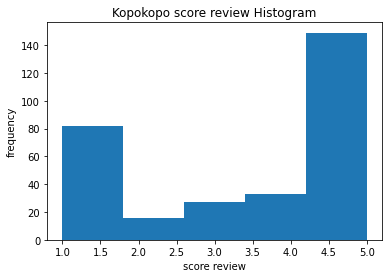

In [ ]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Kopo_koposort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Kopokopo score review Histogram")
plt.show()

# Pesapal

In [ ]:
PesaPalsort_data_sum_missing = PesaPalsort_data.isnull().sum()
print(PesaPalsort_data_sum_missing)

content                 0
reviewCreatedVersion    4
score                   0
at                      0
thumbsUpCount           0
dtype: int64


In [ ]:
highest_score = PesaPalsort_data[PesaPalsort_data["score"]==5]
print("Pesapal highest scores:", highest_score.head())

Pesapal highest scores:                                               content reviewCreatedVersion  \
19                           Uduma nzuri inarahisisha                 None   
2   The app is nice but anytime I try selling on c...                   29   
4            best app need charts summary thanks alot                   29   
1   It's the best love it, saves time and it's acc...                   29   
11                                            Awesome                   20   

    score                  at  thumbsUpCount  
19      5 2021-12-28 10:23:57              0  
2       5 2019-12-09 18:59:03              3  
4       5 2019-01-13 19:23:58              3  
1       5 2018-11-21 09:48:20              7  
11      5 2018-08-18 04:49:06              1  


In [ ]:
medium_score = PesaPalsort_data[PesaPalsort_data["score"] == 3]
print("Pesapal medium score:", medium_score.head()) 

Pesapal medium score:                                              content reviewCreatedVersion  \
0  One of the best POs app, one improvement neede...                 35.4   
5  how do I appdate after selling an item?? pleas...                 None   

   score                  at  thumbsUpCount  
0      3 2022-06-22 06:50:54              0  
5      3 2019-03-21 11:08:51              3  


In [ ]:
print(PesaPalsort_data.reviewCreatedVersion.nunique())
print(PesaPalsort_data.reviewCreatedVersion.unique())
print(PesaPalsort_data.reviewCreatedVersion.value_counts())

7
['35.4' None '29' '32' '20' '16' '14' '11']
20      5
29      4
16      3
14      2
35.4    1
32      1
11      1
Name: reviewCreatedVersion, dtype: int64


In [ ]:
# Find out average of all ratings for each unique version and check which version received highest average rating.
x = (PesaPalsort_data.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
11      5.000000
14      5.000000
16      2.333333
20      4.800000
29      4.750000
32      4.000000
35.4    3.000000
Name: score, dtype: float64


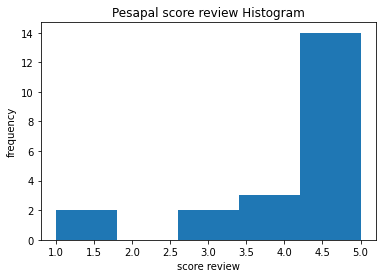

In [ ]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(PesaPalsort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Pesapal score review Histogram")
plt.show()

## **Paystack **

In [ ]:
Paystacksort_data_sum_missing = Paystacksort_data.isnull().sum()
print(Paystacksort_data_sum_missing)

content                  0
reviewCreatedVersion    58
score                    0
at                       0
thumbsUpCount            0
dtype: int64


In [ ]:
highest_score = Paystacksort_data[Paystacksort_data["score"]==5]
print("Paystack highest scores:", highest_score.head())

Paystack highest scores:                 content reviewCreatedVersion  score                  at  \
71     This app is good                1.9.4      5 2022-12-30 15:17:49   
232  Really appreciated                1.9.4      5 2022-12-30 01:58:15   
152    Word conect game                1.9.4      5 2022-12-08 07:46:36   
233       Nice and good                1.9.3      5 2022-11-21 23:22:07   
235                Good                1.8.3      5 2022-10-23 09:41:12   

     thumbsUpCount  
71               0  
232              0  
152              0  
233              1  
235              0  


In [ ]:
medium_score = Paystacksort_data[Paystacksort_data["score"] == 3]
print("Paystack medium score:", medium_score.head()) 

Paystack medium score:                                                content reviewCreatedVersion  \
56          I give it 3 🌟 because it not working today                1.9.4   
55   Why can't I login in to my acct pls help me re...                1.9.3   
269                                               Best                 None   
222          How can I withdraw from my Pay Stack app.                1.8.3   
70   Good evening paystack, I just got a debit aler...                1.8.1   

     score                  at  thumbsUpCount  
56       3 2022-12-01 00:54:55              1  
55       3 2022-11-23 13:12:26              1  
269      3 2022-09-03 07:14:21              0  
222      3 2022-08-24 23:24:38              0  
70       3 2022-01-21 15:56:28              4  


In [ ]:
print(Paystacksort_data.reviewCreatedVersion.nunique())
print(Paystacksort_data.reviewCreatedVersion.unique())
print(Paystacksort_data.reviewCreatedVersion.value_counts())

31
['1.9.4' '1.9.3' None '1.8.3' '1.8.1' '1.8.2' '1.7.2' '1.8.0' '1.3.9'
 '1.6.0' '1.5.3' '1.2.6' '1.3.8' '1.1.9' '1.3.7' '1.3.6' '1.3.1' '1.3.5'
 '1.3.3' '1.3.0' '1.2.5' '1.2.4' '1.2.2' '1.2.0' '1.1.6' '1.1.7' '1.0.4'
 '1.0' '1.1.4' '1.1.3' '1.1.1' '1.0.2']
1.1.7    29
1.8.3    25
1.3.9    23
1.3.1    15
1.1.4    11
1.7.2    10
1.8.1    10
1.2.6     9
1.3.3     8
1.9.3     7
1.2.4     7
1.3.0     6
1.3.8     6
1.1.9     6
1.0       5
1.0.4     5
1.1.6     5
1.2.2     5
1.9.4     5
1.3.6     5
1.5.3     5
1.6.0     3
1.2.5     2
1.8.0     2
1.1.3     2
1.3.5     1
1.2.0     1
1.3.7     1
1.8.2     1
1.1.1     1
1.0.2     1
Name: reviewCreatedVersion, dtype: int64


In [ ]:
# Find out average of all ratings for each unique version and check which version received highest average rating.
x = (Paystacksort_data.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
1.0      2.200000
1.0.2    5.000000
1.0.4    2.800000
1.1.1    5.000000
1.1.3    5.000000
1.1.4    4.363636
1.1.6    3.600000
1.1.7    3.482759
1.1.9    3.833333
1.2.0    3.000000
1.2.2    2.400000
1.2.4    3.142857
1.2.5    3.000000
1.2.6    2.888889
1.3.0    1.166667
1.3.1    3.666667
1.3.3    1.000000
1.3.5    3.000000
1.3.6    1.000000
1.3.7    3.000000
1.3.8    1.500000
1.3.9    1.956522
1.5.3    1.600000
1.6.0    3.666667
1.7.2    2.200000
1.8.0    3.500000
1.8.1    2.100000
1.8.2    1.000000
1.8.3    1.880000
1.9.3    1.857143
1.9.4    4.000000
Name: score, dtype: float64


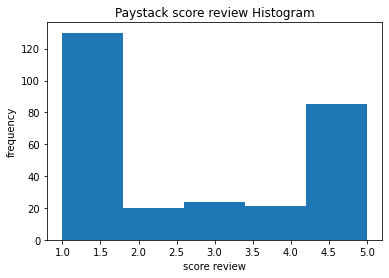

In [ ]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Paystacksort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Paystack score review Histogram")
plt.show()

From the above graph showing the frequency of each rating received, it can be said that most of the times app received either 4 or 5 rating. Thus, it can also be said that the app performs above average.

## **4. UzaPoint**

In [ ]:
Uza_pointsort_data_sum_missing = Uza_pointsort_data.isnull().sum()
print(Uza_pointsort_data_sum_missing)

content                 0
reviewCreatedVersion    9
score                   0
at                      0
thumbsUpCount           0
dtype: int64


In [ ]:
highest_score = Uza_pointsort_data[Uza_pointsort_data["score"]==5]
print("UzaPoint highest scores:", highest_score.head())

UzaPoint highest scores:                                               content reviewCreatedVersion  \
20  It's an amazing app.Whats makes it better is t...               1.16.5   
41          Efficient and easy to use for my business               1.16.5   
37  Excited to use Uzapoint. The e-commerce platfo...               1.16.5   
55  What a wonderful system, since I started Uzapo...               1.16.5   
54                   The best POS so far. Bookskenya.               1.16.5   

    score                  at  thumbsUpCount  
20      5 2022-11-27 21:27:11              0  
41      5 2022-07-22 06:05:47              0  
37      5 2022-07-20 06:43:06              0  
55      5 2022-07-13 08:42:26              0  
54      5 2022-07-13 08:01:51              0  


In [ ]:
medium_score = Uza_pointsort_data[Uza_pointsort_data["score"] == 3]
print("UzaPoint medium score:", medium_score.head()) 

UzaPoint medium score: Empty DataFrame
Columns: [content, reviewCreatedVersion, score, at, thumbsUpCount]
Index: []


In [ ]:
print(Uza_pointsort_data.reviewCreatedVersion.nunique())
print(Uza_pointsort_data.reviewCreatedVersion.unique())
print(Uza_pointsort_data.reviewCreatedVersion.value_counts())

22
['1.16.5' None '1.16.3' '1.16.4' '1.15.3' '1.15.2' '1.15.0' '1.7.0'
 '1.11.0' '1.10.3' '1.8.0' '1.6.1' '1.6.0' '1.5.0' '1.3.1' '1.1.41'
 '1.1.1' '1.1.0' '1.0.9' '1.0.8' '1.0.4' '1.0.2' '1.0.0']
1.16.5    18
1.15.2     5
1.16.4     3
1.15.3     3
1.15.0     3
1.0.2      3
1.0.9      2
1.6.1      2
1.16.3     2
1.1.0      2
1.3.1      2
1.1.1      1
1.0.4      1
1.0.8      1
1.6.0      1
1.1.41     1
1.5.0      1
1.8.0      1
1.10.3     1
1.11.0     1
1.7.0      1
1.0.0      1
Name: reviewCreatedVersion, dtype: int64


In [ ]:
# Find out average of all ratings for each unique version and check which version received highest average rating.
x = (Uza_pointsort_data.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
1.0.0     5.000000
1.0.2     5.000000
1.0.4     5.000000
1.0.8     5.000000
1.0.9     5.000000
1.1.0     5.000000
1.1.1     5.000000
1.1.41    5.000000
1.10.3    5.000000
1.11.0    5.000000
1.15.0    5.000000
1.15.2    5.000000
1.15.3    5.000000
1.16.3    5.000000
1.16.4    5.000000
1.16.5    4.611111
1.3.1     5.000000
1.5.0     5.000000
1.6.0     5.000000
1.6.1     5.000000
1.7.0     5.000000
1.8.0     5.000000
Name: score, dtype: float64


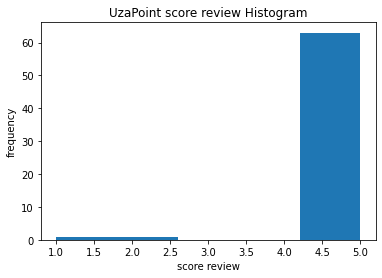

In [ ]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Uza_pointsort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("UzaPoint score review Histogram")
plt.show()

### **Data Pre-processing**

1. Kopokopo
2. Pesapal
3. Paystack

***Lowercasing***
This is to maintain consistency of data


In [ ]:
# check data type of content and change to str
type(Kopo_koposort_data["content"])

pandas.core.series.Series

In [ ]:
#convert to str
Kopo_koposort_data['content'] = Kopo_koposort_data['content'].astype(str)
print(Kopo_koposort_data['content'].head())

163    New year challenge. Add push notifications to ...
0      This new app is not user friendly, to complica...
63     I like how you communicate and also your loan ...
171                                        Good services
145                                       So far so good
Name: content, dtype: object


we note that some of the words are in caps hence leading to inconsistency

In [ ]:
#Lowercase all reviews
Kopo_koposort_data['content'] = Kopo_koposort_data['content'].apply(lambda x: x.lower())
print(Kopo_koposort_data['content'].head()) # to see the difference

163    new year challenge. add push notifications to ...
0      this new app is not user friendly, to complica...
63     i like how you communicate and also your loan ...
171                                        good services
145                                       so far so good
Name: content, dtype: object


## **Emojis**

1. Kopokopo
2. Pesapal
3. Paystack

It is also important to remove emojis from data as it can sometimes create a problem with analysis further.

In [ ]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Kopo_koposort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Kopo_koposort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[100])    


True
great


## **Stopwords**

Removing stopwords can improve the performance to a great extent. Words such as myself, me , she, he , they , mine, you etc. When these words are removed only meaningful tokens are left.

1. Kopokopo
2. Pesapal
3. Paystack

In [ ]:
# stop words
stop_words = stopwords.words('english')
Kopo_koposort_data["extracted_emojis"] = extracted_emojis
Kopo_koposort_data["extracted_emojis"] = Kopo_koposort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Kopo_koposort_data['extracted_emojis'].head())

163    new year challenge. add push notifications to ...
0      this new app is not user friendly, to complica...
63     i like how you communicate and also your loan ...
171                                        good services
145                                       so far so good
Name: extracted_emojis, dtype: object


## **Stemming**

Stemming is also an important process, it chops off the end of the word and transform the word into its root form. All suffixes like -s, -es, -ed, -ing are removed.

1. Kopokopo
2. Pesapal
3. Paystack

In [ ]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


Kopo_koposort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Kopo_koposort_data['extracted_emojis'].head())      

163    new year challenge. add push notifications to ...
0      this new app is not user friendly, to complica...
63     i like how you communicate and also your loan ...
171                                        good services
145                                       so far so good
Name: extracted_emojis, dtype: object


## **Sentiment Score**

Each review will receive sentiment score

1. Kopokopo
2. Pesapal
3. Paystack

In [ ]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

Kopo_koposort_data["Sentiment_score"]= Kopo_koposort_data["extracted_emojis"].apply(senti_sc)
print(Kopo_koposort_data.loc[0:19,['extracted_emojis','Sentiment_score']])


                                      extracted_emojis  \
0    this new app is not user friendly, to complica...   
63   i like how you communicate and also your loan ...   
171                                      good services   
145                                     so far so good   
170                                       good service   
97                                   best for business   
23   great app, withdrawals never take more than 5m...   
96                              awesome app..jah guide   
95                   most beneficial app in business..   
165                                      quite useful.   
73   it is a nice till i recommend other investors ...   
15   very useless app, how can i be transacting my ...   
167                                       very useless   
30   its a very fast approaching app it's much easi...   
8    very slow app very very disappointing app i ca...   
166                                              good.   
42   convient 

In [ ]:
#for i in 
Kopo_koposort_data['Sentiment_score'][0]

Sentiment(polarity=0.17533670033670035, subjectivity=0.6616161616161615)

In [ ]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Kopo_koposort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 


In [ ]:
Kopo_koposort_data['polarity'] = polarity
Kopo_koposort_data['subjectivity'] = subjectivity

In [ ]:
conditions = [(Kopo_koposort_data['polarity'] < 0),(Kopo_koposort_data['polarity'] == 0),(Kopo_koposort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Kopo_koposort_data['feedback'] = np.select(conditions,values)

In [ ]:
Kopo_koposort_data[Kopo_koposort_data.polarity>0].head(10)

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
163,new year challenge. add push notifications to ...,6.0.0,4,2023-01-02 14:53:52,0,new year challenge. add push notifications to ...,"(0.13636363636363635, 0.45454545454545453)",0.136364,0.454545,positive feedback
0,"this new app is not user friendly, to complica...",6.0.0,5,2022-12-30 19:29:44,71,"this new app is not user friendly, to complica...","(0.17533670033670035, 0.6616161616161615)",0.175337,0.661616,positive feedback
171,good services,5.3.0,5,2022-12-16 16:45:40,0,good services,"(0.7, 0.6000000000000001)",0.700000,0.600000,positive feedback
145,so far so good,5.3.0,5,2022-12-16 06:24:05,0,so far so good,"(0.39999999999999997, 0.8)",0.400000,0.800000,positive feedback
170,good service,5.3.0,5,2022-12-14 01:52:08,0,good service,"(0.7, 0.6000000000000001)",0.700000,0.600000,positive feedback
97,best for business,5.3.0,4,2022-12-13 12:17:31,0,best for business,"(1.0, 0.3)",1.000000,0.300000,positive feedback
23,"great app, withdrawals never take more than 5m...",5.3.0,5,2022-12-09 18:07:27,0,"great app, withdrawals never take more than 5m...","(0.44000000000000006, 0.5900000000000001)",0.440000,0.590000,positive feedback
96,awesome app..jah guide,5.3.0,5,2022-12-08 07:10:18,0,awesome app..jah guide,"(1.0, 1.0)",1.000000,1.000000,positive feedback
95,most beneficial app in business..,5.3.0,5,2022-12-04 21:25:52,0,most beneficial app in business..,"(0.5, 0.5)",0.500000,0.500000,positive feedback
165,quite useful.,5.3.0,4,2022-12-04 15:23:28,0,quite useful.,"(0.3, 0.0)",0.300000,0.000000,positive feedback


Subject matter of the negative feedbacks, what are some of the major compalints from customers

In [ ]:
subject_matter = Kopo_koposort_data[Kopo_koposort_data.subjectivity>0.5]
negative_subject_matter = subject_matter[subject_matter.polarity < 0]
negative_subject_matter.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
8,very slow app very very disappointing app i ca...,5.3.0,1,2022-11-04 16:59:12,5,very slow app very very disappointing app i ca...,"(-0.36750000000000005, 0.7075)",-0.367500,0.707500,negative feedback
38,"very high interest rates, not good for a small...",5.3.0,1,2022-09-30 11:46:40,3,"very high interest rates, not good for a small...","(-0.13066666666666665, 0.5673333333333334)",-0.130667,0.567333,negative feedback
19,your app is slow nd very difficult to use. it ...,5.2.0,1,2022-04-22 07:31:10,134,your app is slow nd very difficult to use. it ...,"(-0.4138888888888889, 0.6472222222222221)",-0.413889,0.647222,negative feedback
17,"the new app is very slow, i can't see my total...",5.0.3,1,2021-11-24 08:32:36,10,"the new app is very slow, i can't see my total...","(-0.01727272727272729, 0.5624242424242424)",-0.017273,0.562424,negative feedback
49,my only problem with kopokopo is that i can on...,5.0.3,3,2021-11-11 07:21:19,22,my only problem with kopokopo is that i can on...,"(-0.13125, 0.81875)",-0.131250,0.818750,negative feedback


positive feedback    0.625407
neutral feedback     0.247557
negative feedback    0.127036
Name: feedback, dtype: float64


Text(0.5, 1.0, 'Kopo Kopo feedback rate')

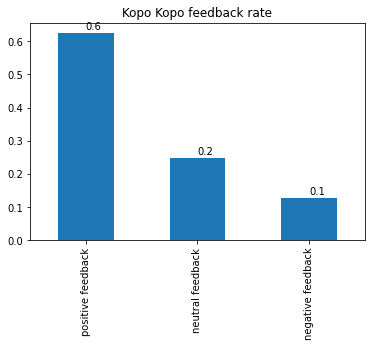

In [ ]:
print(Kopo_koposort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Kopo_koposort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Kopo Kopo feedback rate')

positive feedback    192
neutral feedback      76
negative feedback     39
Name: feedback, dtype: int64


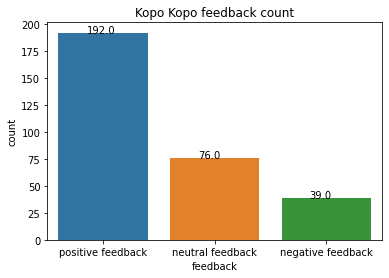

In [ ]:
print(Kopo_koposort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Kopo_koposort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Kopo Kopo feedback count');

# PESAPAL

In [ ]:
#convert to str
PesaPalsort_data['content'] = PesaPalsort_data['content'].astype(str)
print(PesaPalsort_data['content'].head())

0     One of the best POs app, one improvement neede...
19                             Uduma nzuri inarahisisha
6     Pesapal ina saìdia wakati wowote ile unapoiita...
3     Its a good app I wish it were available on des...
2     The app is nice but anytime I try selling on c...
Name: content, dtype: object


In [ ]:
#Lowercase all reviews
PesaPalsort_data['content'] = PesaPalsort_data['content'].apply(lambda x: x.lower())
print(PesaPalsort_data['content'].head()) # to see the difference

0     one of the best pos app, one improvement neede...
19                             uduma nzuri inarahisisha
6     pesapal ina saìdia wakati wowote ile unapoiita...
3     its a good app i wish it were available on des...
2     the app is nice but anytime i try selling on c...
Name: content, dtype: object


In [ ]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(PesaPalsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in PesaPalsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10]) 

True
the director of this program is darafu very good boy


In [ ]:
# stop words
stop_words = stopwords.words('english')
PesaPalsort_data["extracted_emojis"] = extracted_emojis
PesaPalsort_data["extracted_emojis"] = PesaPalsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(PesaPalsort_data['extracted_emojis'].head())

0     one of the best pos app, one improvement neede...
19                             uduma nzuri inarahisisha
6     pesapal ina saìdia wakati wowote ile unapoiita...
3     its a good app i wish it were available on des...
2     the app is nice but anytime i try selling on c...
Name: extracted_emojis, dtype: object


In [ ]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


PesaPalsort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(PesaPalsort_data['extracted_emojis'].head())   

0     one of the best pos app, one improvement neede...
19                             uduma nzuri inarahisisha
6     pesapal ina saìdia wakati wowote ile unapoiita...
3     its a good app i wish it were available on des...
2     the app is nice but anytime i try selling on c...
Name: extracted_emojis, dtype: object


In [ ]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

PesaPalsort_data["Sentiment_score"]= PesaPalsort_data["extracted_emojis"].apply(senti_sc)
print(PesaPalsort_data.loc[0:19,['extracted_emojis','Sentiment_score']])

                                     extracted_emojis Sentiment_score
0   one of the best pos app, one improvement neede...    (0.3, 0.375)
19                           uduma nzuri inarahisisha      (0.0, 0.0)


In [ ]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in PesaPalsort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 

In [ ]:
PesaPalsort_data['polarity'] = polarity
PesaPalsort_data['subjectivity'] = subjectivity

In [ ]:
conditions = [(PesaPalsort_data['polarity'] < 0),(PesaPalsort_data['polarity'] == 0),(PesaPalsort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
PesaPalsort_data['feedback'] = np.select(conditions,values)

In [ ]:
(PesaPalsort_data['subjectivity'] > 0).head()

0      True
19    False
6     False
3      True
2      True
Name: subjectivity, dtype: bool

In [ ]:
subject_matter = PesaPalsort_data[PesaPalsort_data.subjectivity>0.5]
negative_subject_matter = subject_matter[subject_matter.polarity < 0]
negative_subject_matter.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback


positive feedback    0.571429
neutral feedback     0.428571
Name: feedback, dtype: float64


Text(0.5, 1.0, 'PesaPal feedback rate')

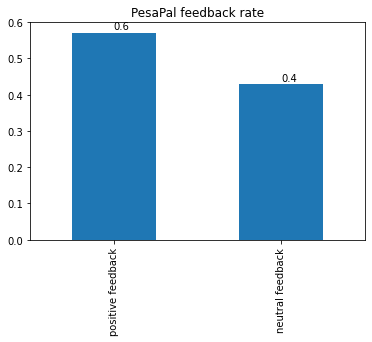

In [ ]:
print(PesaPalsort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  PesaPalsort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('PesaPal feedback rate')

positive feedback    12
neutral feedback      9
Name: feedback, dtype: int64


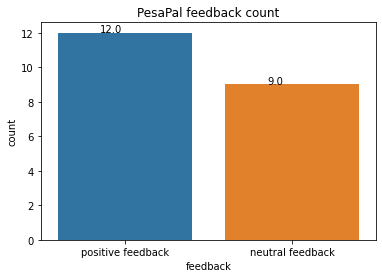

In [ ]:
print(PesaPalsort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = PesaPalsort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('PesaPal feedback count');

## **PAYSTACK**

In [ ]:
#convert to str
Paystacksort_data['content'] = Paystacksort_data['content'].astype(str)
print(Paystacksort_data['content'].head())

71                                      This app is good
232                                   Really appreciated
52     Kenya is missing on registration. I thought yo...
152                                     Word conect game
56            I give it 3 🌟 because it not working today
Name: content, dtype: object


In [ ]:
#Lowercase all reviews
Paystacksort_data['content'] = Paystacksort_data['content'].apply(lambda x: x.lower())
print(Paystacksort_data['content'].head()) # to see the difference

71                                      this app is good
232                                   really appreciated
52     kenya is missing on registration. i thought yo...
152                                     word conect game
56            i give it 3 🌟 because it not working today
Name: content, dtype: object


In [ ]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Paystacksort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Paystacksort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10]) 

True
there is a bug in this current update... i can't sign in, rather it takes me back to the creat account page...


In [ ]:
# stop words
stop_words = stopwords.words('english')
Paystacksort_data["extracted_emojis"] = extracted_emojis
Paystacksort_data["extracted_emojis"] = Paystacksort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Paystacksort_data['extracted_emojis'].head())

71                                      this app is good
232                                   really appreciated
52     kenya is missing on registration. i thought yo...
152                                     word conect game
56             i give it 3  because it not working today
Name: extracted_emojis, dtype: object


In [ ]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


Paystacksort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Paystacksort_data['extracted_emojis'].head())   

71                                      this app is good
232                                   really appreciated
52     kenya is missing on registration. i thought yo...
152                                     word conect game
56             i give it 3  because it not working today
Name: extracted_emojis, dtype: object


In [ ]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

Paystacksort_data["Sentiment_score"]= Paystacksort_data["extracted_emojis"].apply(senti_sc)
print(Paystacksort_data.loc[0:19,['extracted_emojis','Sentiment_score']])

                                      extracted_emojis  \
0    please this updated version is really giving m...   
59   it's good just the biometric login is not work...   
18   the refund button is not working. what is wron...   
117  paystach pls what is wrong today? i have a gam...   
235                                               good   
19   very useless app , app is supposed to have its...   

                               Sentiment_score  
0                             (-0.05, 0.30625)  
59                   (0.7, 0.6000000000000001)  
18    (0.2333333333333333, 0.7000000000000001)  
117                              (-0.55, 0.72)  
235                  (0.7, 0.6000000000000001)  
19   (-0.0666666666666667, 0.4033333333333333)  


In [ ]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Paystacksort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 

In [ ]:
Paystacksort_data['polarity'] = polarity
Paystacksort_data['subjectivity'] = subjectivity

In [ ]:
conditions = [(Paystacksort_data['polarity'] < 0),(Paystacksort_data['polarity'] == 0),(Paystacksort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Paystacksort_data['feedback'] = np.select(conditions,values)

Subject matter on the negative feedbacks 

In [ ]:
subject_matter = Paystacksort_data[Paystacksort_data.subjectivity>0.5]
negative_subject_matter = subject_matter[subject_matter.polarity < 0]
negative_subject_matter.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
1,after creating an account in the app i could n...,1.9.3,1,2022-11-19 11:32:25,3,after creating an account in the app i could n...,"(-0.52, 0.78)",-0.52,0.780000,negative feedback
117,paystach pls what is wrong today? i have a gam...,1.8.3,1,2022-10-26 10:23:30,0,paystach pls what is wrong today? i have a gam...,"(-0.55, 0.72)",-0.55,0.720000,negative feedback
17,i'm disappointed..i made a payment to an opay ...,1.8.3,1,2022-10-18 21:03:34,1,i'm disappointed..i made a payment to an opay ...,"(-0.1499999999999999, 0.7833333333333333)",-0.15,0.783333,negative feedback
234,terrible platform.,1.8.3,1,2022-08-29 17:17:46,0,terrible platform.,"(-1.0, 1.0)",-1.00,1.000000,negative feedback
13,it's more than one week now since paystack blo...,1.8.3,1,2022-08-22 03:23:40,6,it's more than one week now since paystack blo...,"(-0.10000000000000002, 0.5666666666666667)",-0.10,0.566667,negative feedback


positive feedback    0.514286
neutral feedback     0.285714
negative feedback    0.200000
Name: feedback, dtype: float64


Text(0.5, 1.0, 'Paystack feedback rate')

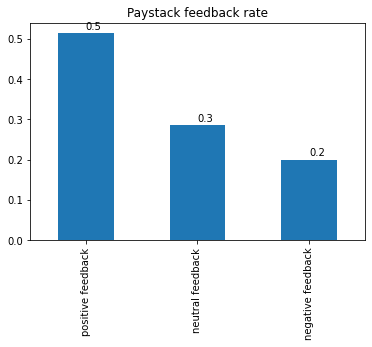

In [ ]:
print(Paystacksort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Paystacksort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Paystack feedback rate')

positive feedback    144
neutral feedback      80
negative feedback     56
Name: feedback, dtype: int64


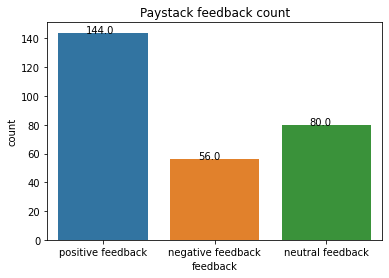

In [ ]:
print(Paystacksort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Paystacksort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Paystack feedback count');

## **UzaPoint**

In [ ]:
#convert to str
Uza_pointsort_data['content'] = Uza_pointsort_data['content'].astype(str)
print(Uza_pointsort_data['content'].head())

20    It's an amazing app.Whats makes it better is t...
13    'You need an API key to authenticate all reque...
41            Efficient and easy to use for my business
37    Excited to use Uzapoint. The e-commerce platfo...
55    What a wonderful system, since I started Uzapo...
Name: content, dtype: object


In [ ]:
#Lowercase all reviews
Uza_pointsort_data['content'] = Uza_pointsort_data['content'].apply(lambda x: x.lower())
print(Uza_pointsort_data['content'].head()) # to see the difference


20    it's an amazing app.whats makes it better is t...
13    'you need an api key to authenticate all reque...
41            efficient and easy to use for my business
37    excited to use uzapoint. the e-commerce platfo...
55    what a wonderful system, since i started uzapo...
Name: content, dtype: object


In [ ]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Uza_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)

for i in Uza_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10]) 

True
simple, easy and efficient for my business. best pos solution in kenya.


In [ ]:
# stop words
stop_words = stopwords.words('english')
Uza_pointsort_data["extracted_emojis"] = extracted_emojis
Uza_pointsort_data["extracted_emojis"] = Uza_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Uza_pointsort_data['extracted_emojis'].head())

20    it's an amazing app.whats makes it better is t...
13    'you need an api key to authenticate all reque...
41            efficient and easy to use for my business
37    excited to use uzapoint. the e-commerce platfo...
55    what a wonderful system, since i started uzapo...
Name: extracted_emojis, dtype: object


In [ ]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)

Uza_pointsort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Uza_pointsort_data['extracted_emojis'].head()) 

20    it's an amazing app.whats makes it better is t...
13    'you need an api key to authenticate all reque...
41            efficient and easy to use for my business
37    excited to use uzapoint. the e-commerce platfo...
55    what a wonderful system, since i started uzapo...
Name: extracted_emojis, dtype: object


In [ ]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

Uza_pointsort_data["Sentiment_score"]= Uza_pointsort_data["extracted_emojis"].apply(senti_sc)
print(Uza_pointsort_data.loc[0:19,['extracted_emojis','Sentiment_score']])

                                     extracted_emojis  \
0   an amazing pos for sure. very effective in man...   
44        new and very modern app. a pleasure to use.   
56  sending bulk messages to my customers is as ea...   
19  i have been using this app for sometime now an...   

                               Sentiment_score  
0     (0.5304761904761905, 0.8460317460317459)  
44  (0.19818181818181818, 0.42227272727272724)  
56   (0.43333333333333335, 0.8333333333333334)  
19                                  (0.0, 0.0)  


In [ ]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Uza_pointsort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0)

In [ ]:
Uza_pointsort_data['polarity'] = polarity
Uza_pointsort_data['subjectivity'] = subjectivity

In [ ]:
conditions = [(Uza_pointsort_data['polarity'] < 0),(Uza_pointsort_data['polarity'] == 0),(Uza_pointsort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Uza_pointsort_data['feedback'] = np.select(conditions,values)

In [ ]:
subject_matter = Uza_pointsort_data[Uza_pointsort_data.subjectivity>0.5]
negative_subject_matter = subject_matter[subject_matter.polarity < 0]
negative_subject_matter.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback


positive feedback    0.923077
neutral feedback     0.076923
Name: feedback, dtype: float64


Text(0.5, 1.0, 'UzaPoint feedback rate')

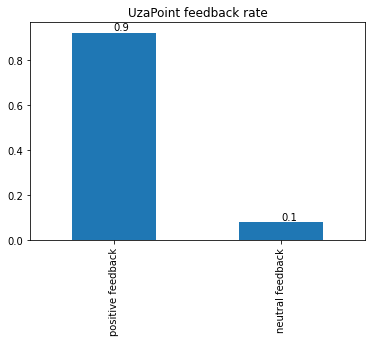

In [ ]:
print(Uza_pointsort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Uza_pointsort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('UzaPoint feedback rate')

positive feedback    60
neutral feedback      5
Name: feedback, dtype: int64


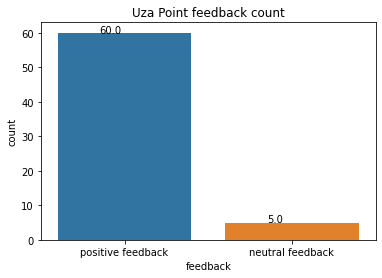

In [ ]:
print(Uza_pointsort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Uza_pointsort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Uza Point feedback count');


Overall feedback rate

From the above results sentiment polarity and subjectivity has been calculated. Sentiment polarity is denoting if the review is positive or negative and subjectivity is denoting the subjectivity of the text.

Further, this analysis can be used in various other applications where the aspects of the product or the application that are more positively accepted in market can be explored for more business opportunities.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mi

In [ ]:
!jupyter nbconvert --to pdf /content/Google_play_store_Analysis.ipynb

[NbConvertApp] WARNING | pattern '/content/Google_play_store_Analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer